descargando tweets antes del ID Nro1180770200951627775
400 tweets descargados hasta el momento
descargando tweets antes del ID Nro1181207320019263487
400 tweets descargados hasta el momento


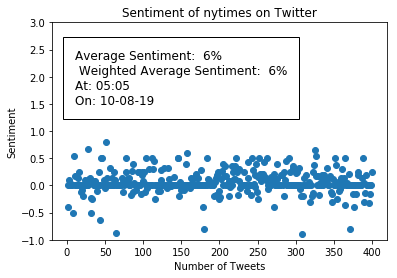

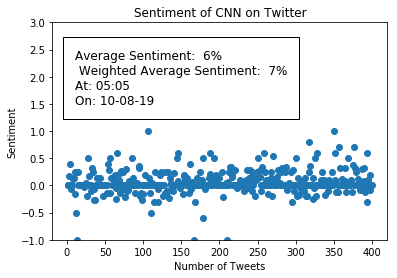

In [4]:
#Este código está basado en la guía de Free Code Camp "Basic data analysis on Twitter with Python"
#Ahttps://medium.freecodecamp.org/basic-data-analysis-on-twitter-with-python-251c2a85062e
#para hacer Análisis de Sentimientos sobre Twitter usando la librería TextBlob de Python que dispone
#de modelos de NLP para diversos usos.

#Importar consumer API de Twitter https://github.com/tweepy/tweepy
import tweepy
#importar las credenciales de Twitter de un script
import twkeys
#Importar librería para Sentiment Analysis
from textblob import TextBlob
from time import sleep
from datetime import datetime
#Importar para graficar los Datos
%matplotlib inline
import matplotlib.pyplot as plt
#Importar para calcular promedio ponderado
import numpy as np

#Credenciales del Twitter API que están el el script twkeys.py
consumer_key = twkeys.consumer_key()
consumer_secret = twkeys.consumer_secret()
access_key = twkeys.access_key()
access_secret = twkeys.access_secret()

def get_all_tweets(screen_name,graph_id):
    #Este método solo tiene permitido descargar máximo los ultimos 3240 tweets del usuario
    #Especificar aquí durante las pruebas un número entre 200 y 3240
    limit_number = 200 #3240
    
    #autorizar twitter, inicializar tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    #inicializar una list to para almacenar los Tweets descargados por tweepy
    alltweets = []    
    
    #Hacer una petición inicial por los 200 tweets más recientes (200 es el número máximo permitido)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #guardar los tweets más recientes
    alltweets.extend(new_tweets)
    
    #guardar el ID del tweet más antiguo menos 1
    oldest = alltweets[-1].id - 1
    
    #recorrer todos los tweets en la cola hasta que no queden más
    while len(new_tweets) > 0 and len(alltweets) <= limit_number:
        print ("descargando tweets antes del ID Nro" + str(oldest))
        
        #en todas las peticiones siguientes usar el parámetro max_id para evitar duplicados
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #guardar los tweets descargados
        alltweets.extend(new_tweets)
        
        #actualizar el ID del tweet más antiguo menos 1
        oldest = alltweets[-1].id - 1
        
        #informar en la consola como vamos
        print (str(len(alltweets)) + " tweets descargados hasta el momento")
    
    #Realizar el análisis de sentimiento de los tweets descargados

    #Crear las listas de polaridad polarity_list y frecuencia de polaridad numbers_list
    polarity_list = []
    numbers_list = []
    number = 1

    for tweet in alltweets:
        if tweet.lang == "en":
            try:
                analysis = TextBlob(tweet.text)
                analysis = analysis.sentiment
                #Guardar la polaridad
                polarity = analysis.polarity
                polarity_list.append(polarity)
                #Contar las veces que esa polaridad ha ocurrido
                numbers_list.append(number)
                number = number + 1
            except tweepy.TweepError as e:
                print(e.reason)
            except StopIteration:
                break

    #Crear eje cartesiano
    plt.figure(graph_id)
    axes = plt.gca()
    axes.set_ylim([-1, 3])
    plt.scatter(numbers_list, polarity_list)
    
    #Calcular el promedio de polaridad, NOTA: No es promedio ponderado
    averagePolarity = (sum(polarity_list))/(len(polarity_list))
    averagePolarity = "{0:.0f}%".format(averagePolarity * 100)
    time  = datetime.now().strftime("At: %H:%M\nOn: %m-%d-%y")

    #Calcular el promedio ponderado
    weighted_avgPolarity = np.average(polarity_list, weights=numbers_list)
    weighted_avgPolarity = "{0:.0f}%".format(weighted_avgPolarity * 100)

    #Agregar texto con el promedio de sentimiento
    plt.text(10, 1.5, "Average Sentiment:  " + str(averagePolarity) + "\n" + " Weighted Average Sentiment:  " + str(weighted_avgPolarity) + "\n" + time, fontsize=12, bbox = dict(facecolor='none', edgecolor='black', boxstyle='square, pad = 1'))

    #Título
    plt.title("Sentiment of " + screen_name + " on Twitter")
    plt.xlabel("Number of Tweets")
    plt.ylabel("Sentiment")       
    pass

if __name__ == '__main__':
    #especificar el nombre de usuario de la cuenta a la cual se descargarán los tweets
    get_all_tweets("nytimes",200)
    get_all_tweets("CNN",300)
    #Mostrar las gráfica
    plt.show()